In [1]:
import h5py
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import *
from tensorflow import keras
from tensorflow.keras import layers, models, Model
from sklearn.metrics import roc_curve, auc
import tensorflow.keras.backend as K
import qkeras
from qkeras import *

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
data = pd.read_parquet('recon3D/recon3D_d17301.parquet')
labels = pd.read_parquet('labels/labels_d17301.parquet')

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,5450,5451,5452,5453,5454,5455,5456,5457,5458,5459
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
labels

,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,y-local,pt,cotAlpha,cotBeta,y-midplane,x-midplane
0,4.198420,21.228418,100.0,0.768970,-0.160933,-0.634940,10570.0,-6.941040,0.656019,-1.211091,0.253462,8.555331,64.752961
1,129.548080,-1.019828,100.0,-1.205132,-0.087774,-0.635886,13639.0,-4.336690,0.637776,1.895201,0.138034,-7.921537,34.788013
2,-51.428604,13.324836,100.0,1.542896,-0.322932,-1.512257,10535.0,-7.793790,-1.547540,-1.020260,0.213543,2.647683,-0.415582
3,-212.990051,5.540823,100.0,1.451834,-0.039285,-0.467361,23534.0,-2.674480,0.468860,-3.106451,0.084057,1.337969,-57.667506
4,60.380154,9.740603,100.0,-0.110369,-0.034764,-0.554253,6478.0,-2.116850,0.555289,0.199131,0.062722,6.604490,50.423600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,96.568550,7.587233,100.0,-2.399552,0.002703,-0.711725,24256.0,0.424617,-0.714186,3.371459,-0.003798,7.777124,-72.004424
49993,48.361015,-4.126176,100.0,0.196396,0.021498,-0.544145,6976.0,0.843422,-0.544433,-0.360926,-0.039508,-2.150783,66.407308
49994,-59.602924,2.047855,100.0,1.463295,0.033369,-0.601659,22251.0,3.529370,0.604437,-2.432100,-0.055462,4.820937,62.002088
49995,44.907749,5.834536,100.0,-0.284971,0.048327,-0.685129,10508.0,2.084540,-0.686738,0.415938,-0.070537,9.361390,24.110863


In [10]:
data_=data.to_numpy()

In [13]:
data_=np.reshape(data_,(-1,20,13,21))

In [15]:
data_.shape

(49997, 20, 13, 21)

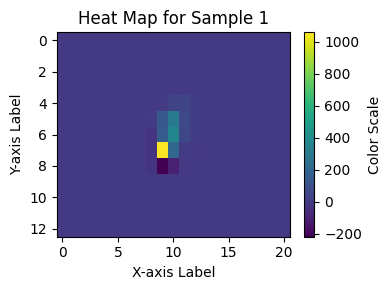

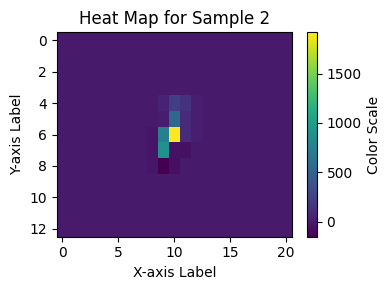

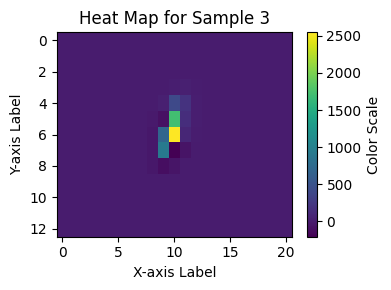

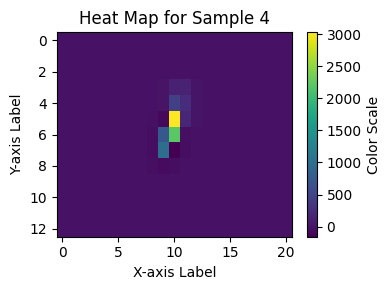

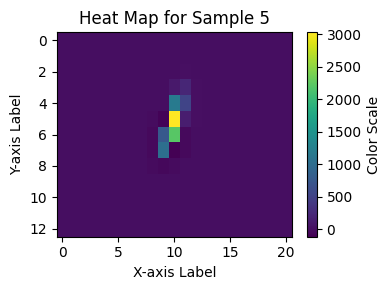

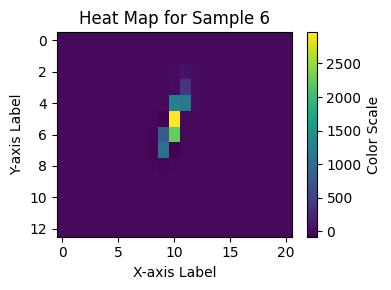

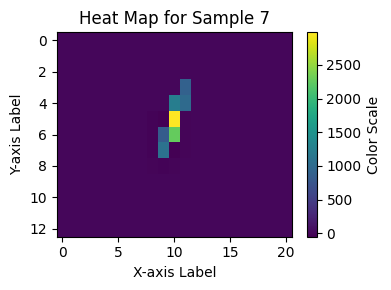

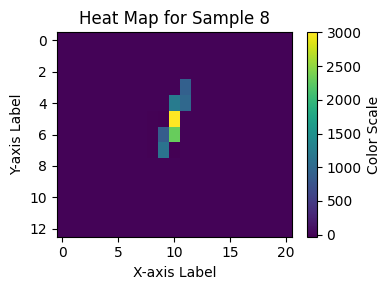

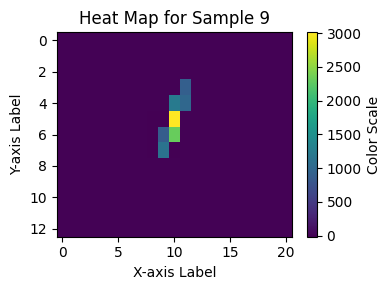

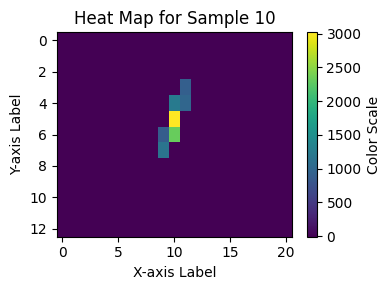

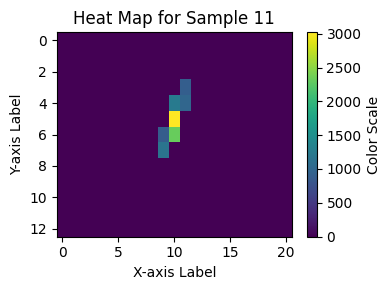

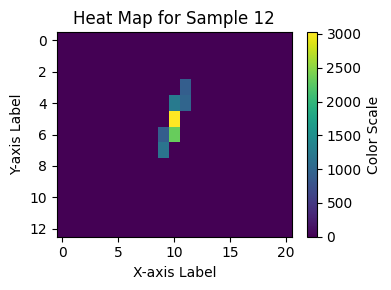

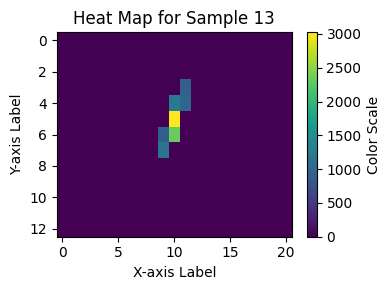

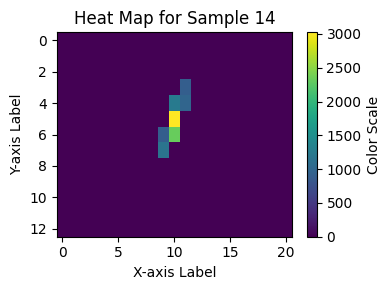

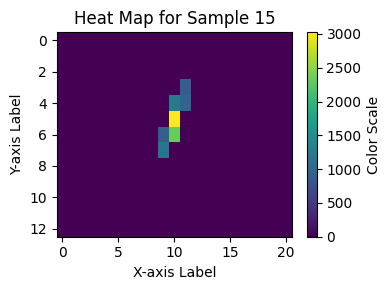

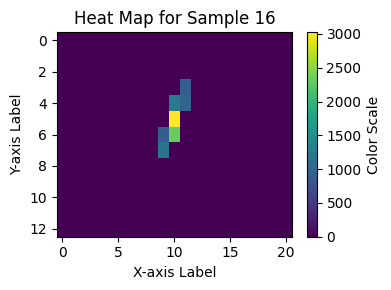

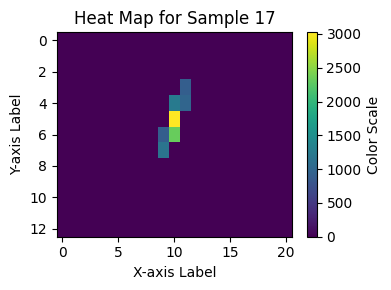

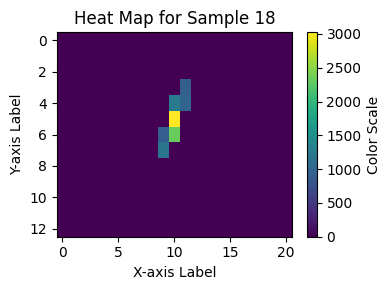

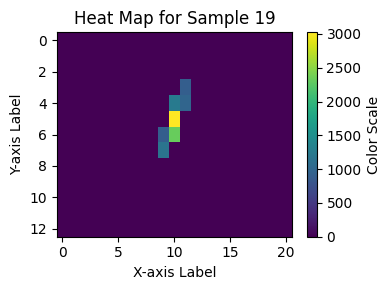

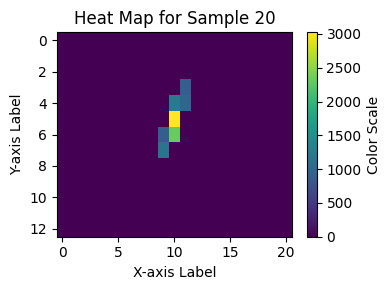

In [20]:
for i in range(data_[2].shape[0]):
    plt.figure(figsize=(4, 3))
    plt.imshow(data_[2][i], aspect='auto', interpolation='none', cmap='viridis')
    plt.title(f'Heat Map for Sample {i+1}')
    plt.xlabel('X-axis Label')
    plt.ylabel('Y-axis Label')
    plt.colorbar(label='Color Scale')
    plt.tight_layout()
    plt.show()